<center><h1>E-COMMERCE TRANSACTION DATA ANALYSIS</h1>

## DATA CLEANING AND PREPROCESSING

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
c_df=pd.read_csv("customers.csv")
p_df=pd.read_csv("products.csv")
t_df=pd.read_csv("transactions.csv")

In [3]:
c_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
c_df.shape

(200, 4)

In [5]:
#null value checking
c_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
#duplicate checking
c_df.duplicated().sum()

0

In [7]:
c_df.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [8]:
#datatype changing
c_df["SignupDate"]=pd.to_datetime(c_df["SignupDate"])

In [9]:
c_df.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [10]:
p_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
p_df.shape

(100, 4)

In [12]:
p_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [13]:
p_df.duplicated().sum()

0

In [14]:
p_df.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [15]:
t_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
t_df.shape

(1000, 7)

In [17]:
t_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [18]:
t_df.duplicated().sum()

0

In [19]:
t_df.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [20]:
t_df["TransactionDate"]=pd.to_datetime(t_df["TransactionDate"])

In [21]:
t_df.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

*datasets are cleaned*

## EXPLORATORY DATA ANALYSIS (EDA)

### UNIVARIATE ANALYSIS

In [22]:
#adding new column
c_df["signup_year"]=c_df["SignupDate"].dt.year

<Axes: xlabel='Region'>

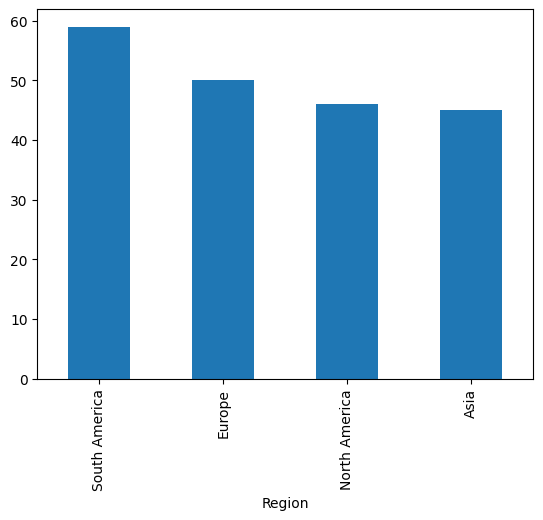

In [23]:
c_df["Region"].value_counts().plot(kind='bar')

*highest number of customers in south america and lowest in asia*

<Axes: xlabel='signup_year'>

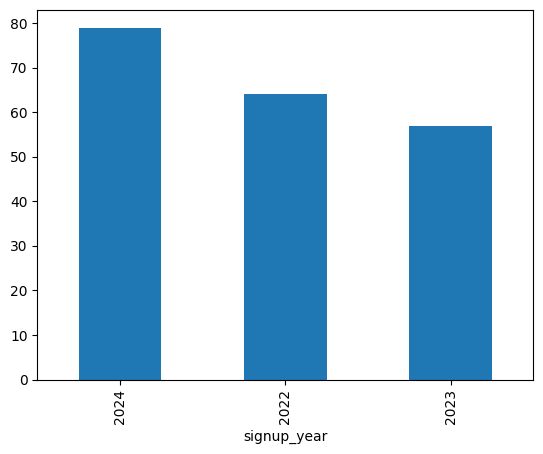

In [24]:
c_df["signup_year"].value_counts().plot(kind="bar")

*highest number of customers signed up in 2024*

<Axes: ylabel='count'>

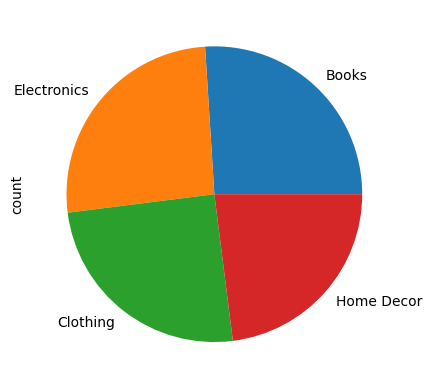

In [45]:
p_df["Category"].value_counts().plot(kind="pie")

*books and electronics sell more in number and they produce more revenue*

In [26]:
t_df["trans_month"]=t_df["TransactionDate"].dt.month_name()

In [27]:
t_df["trans_month"].value_counts()

trans_month
January      107
September     96
July          96
August        94
May           86
April         86
December      82
March         80
February      77
October       70
June          69
November      57
Name: count, dtype: int64

In [28]:
t_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,August
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,May
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,April
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,March
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,March
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,October
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,June
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,April
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,September


<Axes: xlabel='trans_month'>

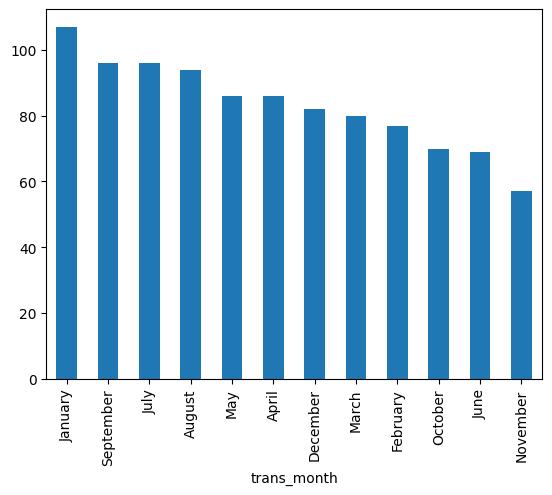

In [29]:
t_df["trans_month"].value_counts().plot(kind="bar")

*highest sales in january*

### BIVARIATE ANALYSIS

<Axes: xlabel='Region', ylabel='Count'>

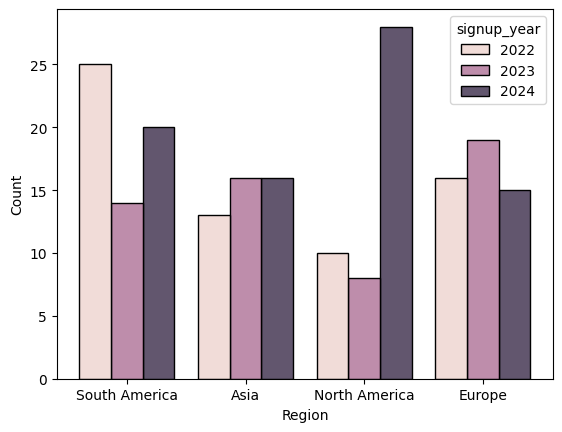

In [30]:
sns.histplot(x="Region",hue="signup_year",data=c_df,multiple="dodge",stat="count",shrink=.8)

*there is a boom in customers nuber in North America in 2023*

<Axes: xlabel='Category', ylabel='Price'>

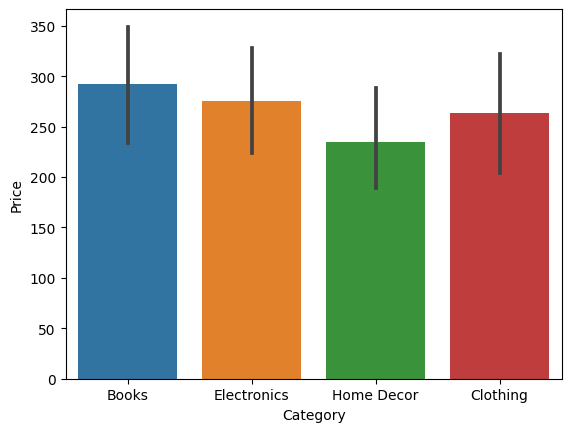

In [31]:
sns.barplot(x="Category",y="Price",data=p_df,estimator="average")

*average price of books and electronics generate more *

In [32]:
months=['January','February','March','April','May','June', 'July','August','September', 'October','November','December']

<Axes: xlabel='trans_month', ylabel='TotalValue'>

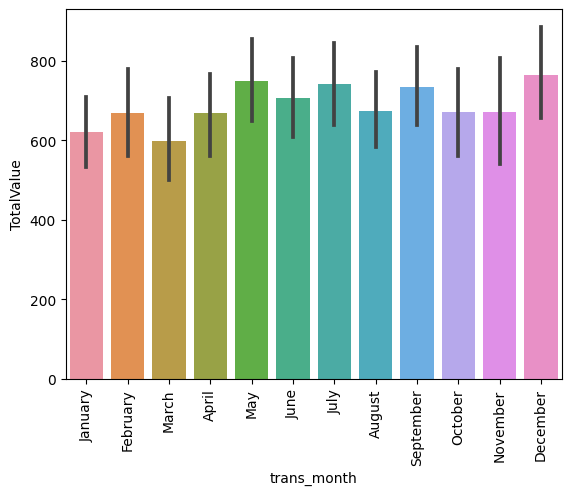

In [33]:
plt.xticks(rotation=90)
sns.barplot(x="trans_month",y="TotalValue",data=t_df,estimator="average",order=months)

*highest average sales in may,july and september and december*

In [34]:
# merge 2 datasets
df1 = t_df.merge(c_df[['CustomerID','Region','signup_year']], on ='CustomerID')

In [35]:
df1

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_month,Region,signup_year
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,August,Europe,2022
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,October,Europe,2022
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,August,Europe,2022
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,October,Europe,2022
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,May,Asia,2024
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,January,South America,2023
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,September,South America,2023
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,December,South America,2024
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,December,Asia,2024


In [36]:
merge_df=df1.merge(p_df[["ProductID","Category"]],on="ProductID")

In [37]:
pd.set_option("display.max_columns",None)
merge_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_month,Region,signup_year,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,August,Europe,2022,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,May,Asia,2024,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,April,Europe,2024,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,March,South America,2024,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,March,Europe,2022,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,October,South America,2024,Home Decor
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,July,South America,2022,Clothing
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,June,South America,2022,Clothing
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,September,South America,2022,Clothing


<Axes: xlabel='Category', ylabel='TotalValue'>

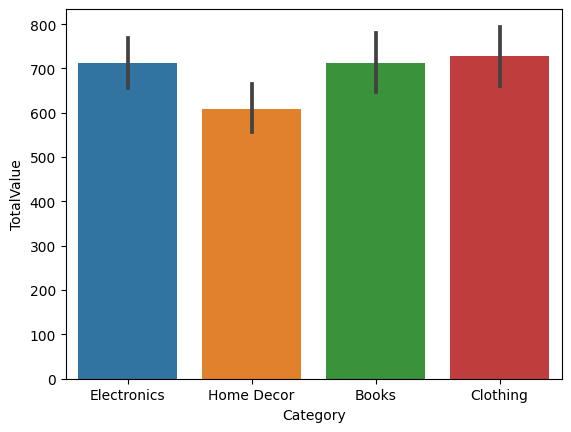

In [38]:
sns.barplot(x="Category",y="TotalValue",data=merge_df,estimator="average")

*highest revenue from clothing,book and elecronics*

<Axes: xlabel='trans_month', ylabel='Count'>

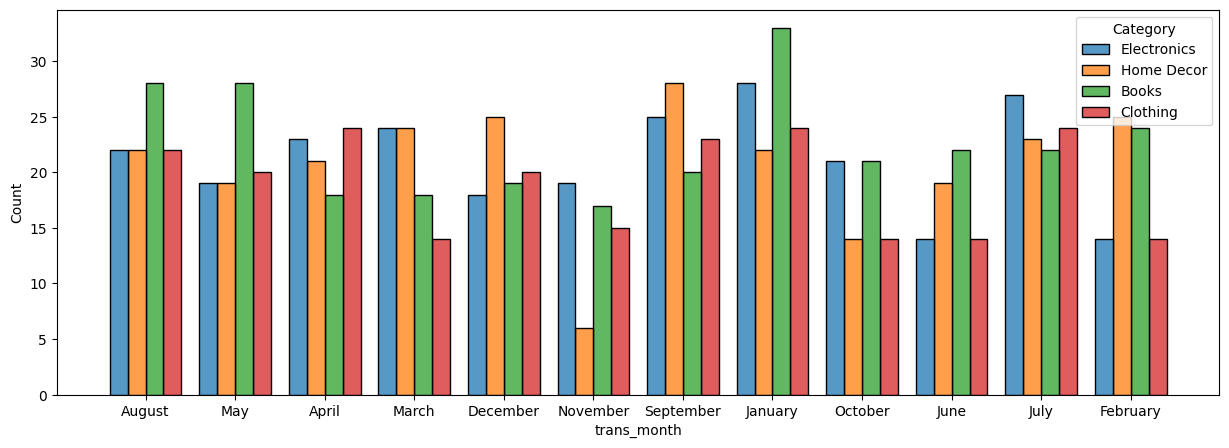

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(x="trans_month",hue="Category",data=merge_df,multiple="dodge",stat="count",shrink=.8)

<Axes: xlabel='Region', ylabel='Density'>

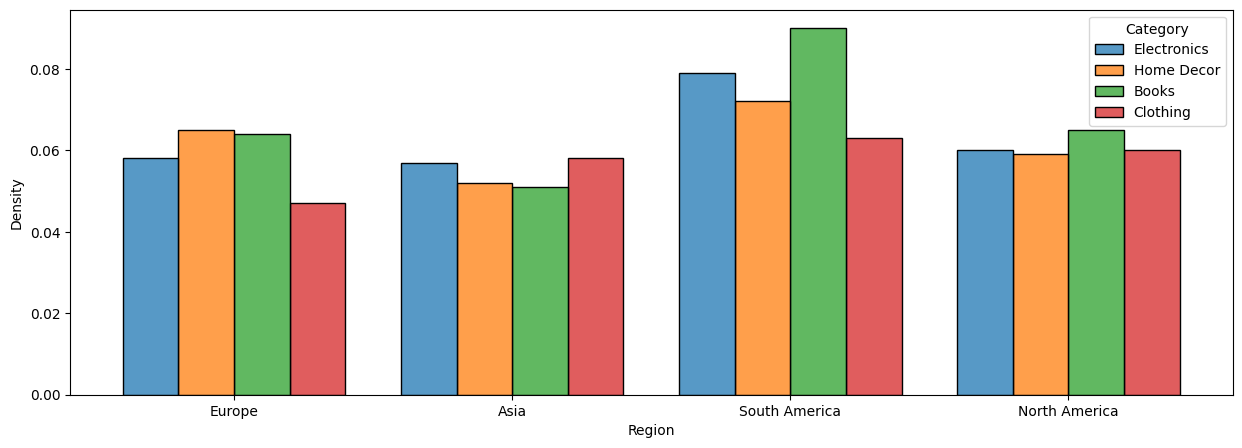

In [40]:
plt.figure(figsize=(15,5))
sns.histplot(x="Region",hue="Category",data=merge_df,multiple="dodge",stat="density",shrink=.8)

<Axes: xlabel='Region', ylabel='TotalValue'>

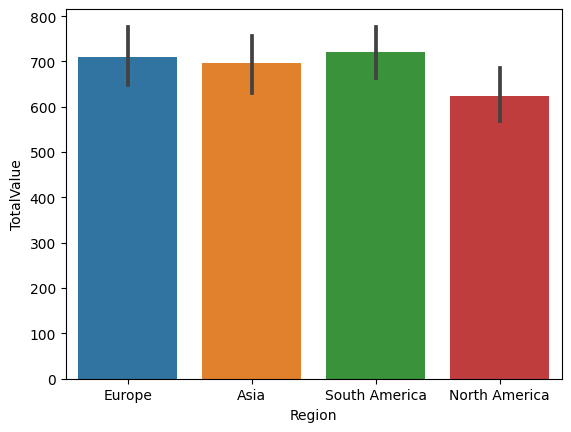

In [41]:
sns.barplot(x="Region",y="TotalValue",data=merge_df,estimator="average")

*Average revenue from north america is low*

In [42]:
merge_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,trans_month,Region,signup_year,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,August,Europe,2022,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,May,Asia,2024,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,April,Europe,2024,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,March,South America,2024,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,March,Europe,2022,Electronics
...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,October,South America,2024,Home Decor
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,July,South America,2022,Clothing
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,June,South America,2022,Clothing
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,September,South America,2022,Clothing


In [51]:
p_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [55]:
p_df[p_df["Category"]=="Clothing"]["ProductName"].unique()

array(['TechPro T-Shirt', 'ActiveWear Jacket', 'ActiveWear Running Shoes',
       'ComfortLiving Sweater', 'HomeSense T-Shirt', 'ActiveWear T-Shirt',
       'BookWorld Jacket', 'SoundWave T-Shirt', 'BookWorld Sweater',
       'SoundWave Jacket', 'SoundWave Jeans', 'HomeSense Running Shoes',
       'ActiveWear Jeans', 'HomeSense Sweater', 'TechPro Running Shoes',
       'BookWorld Running Shoes'], dtype=object)

In [56]:
p_df[p_df["Category"]=="Books"]["ProductName"].unique()

array(['ActiveWear Biography', 'ComfortLiving Biography',
       'SoundWave Cookbook', 'ActiveWear Textbook',
       'ComfortLiving Mystery Book', 'ActiveWear Cookbook',
       'BookWorld Cookbook', 'SoundWave Mystery Book', 'SoundWave Novel',
       'TechPro Cookbook', 'TechPro Textbook', 'BookWorld Biography',
       'HomeSense Novel', 'TechPro Novel', 'SoundWave Textbook'],
      dtype=object)

In [57]:
p_df[p_df["Category"]=="Electronics"]["ProductName"].unique()

array(['ActiveWear Smartwatch', 'BookWorld Bluetooth Speaker',
       'ComfortLiving Smartwatch', 'ComfortLiving Headphones',
       'BookWorld Smartwatch', 'HomeSense Headphones',
       'SoundWave Bluetooth Speaker', 'SoundWave Headphones',
       'TechPro Headphones', 'SoundWave Smartwatch', 'TechPro Smartwatch',
       'ComfortLiving Smartphone', 'ActiveWear Headphones',
       'ActiveWear Smartphone', 'ComfortLiving Bluetooth Speaker',
       'ComfortLiving Laptop', 'HomeSense Bluetooth Speaker',
       'SoundWave Laptop'], dtype=object)

In [59]:
p_df[p_df["Category"]=="Home Decor"]["ProductName"].unique()

array(['BookWorld Rug', 'ActiveWear Rug', 'BookWorld Wall Art',
       'SoundWave Desk Lamp', 'SoundWave Rug', 'HomeSense Wall Art',
       'ActiveWear Cookware Set', 'HomeSense Desk Lamp', 'TechPro Vase',
       'ComfortLiving Cookware Set', 'ComfortLiving Desk Lamp',
       'TechPro Rug', 'HomeSense Rug', 'ComfortLiving Rug',
       'ActiveWear Wall Art', 'HomeSense Cookware Set',
       'BookWorld Cookware Set'], dtype=object)